In [10]:
import pandas as pd

matches_train_data = pd.read_csv('../data/raw/train/matches.csv')

player_data_columns = [f"map{map_num}Team{team_num}Side{side}Player{player_num}{attribute}"
                for map_num in range(1, 6) 
                for team_num in range(1, 3) 
                for player_num in range(1, 6)
                for attribute in ["Id", "Name", "Rating"]
                for side in ["Both"]]

df_matches_train_data = matches_train_data[player_data_columns]

prefixes = ['map{}Team{}SideBothPlayer{}']

rows = []

def process_player(player_id, player_name, player_rating):
    if player_id == "Not Available" or player_name == "Not Available" or player_rating == "Not Available":
        return
    else:
        player_rating = float(player_rating)

    rows.append({'id': int(player_id), 'name': str(player_name).strip(), 'rating': float(player_rating)})

for map_num in range(1, 6):
    for team_num in range(1, 3):
        for player_num in range(1, 6):
            player_id_col = f'map{map_num}Team{team_num}SideBothPlayer{player_num}Id'
            player_name_col = f'map{map_num}Team{team_num}SideBothPlayer{player_num}Name'
            player_rating_col = f'map{map_num}Team{team_num}SideBothPlayer{player_num}Rating'
            
            if player_id_col in df_matches_train_data.columns:
                for idx, player_id in df_matches_train_data[player_id_col].items():
                    player_name = df_matches_train_data.at[idx, player_name_col]
                    player_rating = df_matches_train_data.at[idx, player_rating_col]
                    process_player(player_id, player_name, player_rating)

all_ratings_df = pd.DataFrame(rows)

PROCESSED_FILES_FOLDER = '../data/processed'
OUTPUT_PATH = f'{PROCESSED_FILES_FOLDER}/all_ratings.csv'

all_ratings_df.to_csv(OUTPUT_PATH, index=False)

aggregated_df = all_ratings_df.groupby(['id']).agg(
    name=('name', 'first'),
    min_rating=('rating', 'min'),
    avg_rating=('rating', 'mean'),
    max_rating=('rating', 'max'),
    matches_count=('id', 'size')
).reset_index()

display(aggregated_df)

max_indices = aggregated_df['max_rating'].idxmax()
min_indices = aggregated_df['max_rating'].idxmin()

max_rows = aggregated_df.loc[max_indices]
min_rows = aggregated_df.loc[min_indices]

display(max_rows)
display(min_rows)

/var/folders/10/t4cd3lc515j88jjkvk8hvrbw0000gn/T/ipykernel_54332/2276829818.py:3: DtypeWarning: Columns (35,36,37,41,42,43,44,45,46,47,48,49,50,51,52,56,57,58,59,60,61,65,66,67,68,69,70,71,72,73,74,75,76,80,81,82,83,84,85,89,90,91,92,93,94,95,96,97,98,99,100,104,105,106,107,108,109,113,114,115,116,117,118,119,120,121,122,123,124,128,129,130,131,132,133,137,138,139,140,141,142,143,144,145,146,147,148,152,153,154,155,156,157,161,162,163,164,165,166,167,168,169,170,171,172,176,177,178,179,180,181,185,186,187,188,189,190,191,192,193,194,195,196,200,201,202,203,204,205,209,210,211,212,213,214,215,216,217,218,219,220,224,225,226,227,228,229,233,234,235,236,237,238,239,240,241,242,243,244,248,249,250,251,252,253,257,258,259,260,261,262,263,264,265,266,267,268,272,273,274) have mixed types. Specify dtype option on import or set low_memory=False.
  matches_train_data = pd.read_csv('../data/raw/train/matches.csv')


,id,name,min_rating,avg_rating,max_rating,matches_count
0,29,Patrik 'f0rest' Lindberg,0.37,0.961250,1.50,16
1,39,Christopher 'GeT_RiGhT' Alesund,0.65,0.912500,1.22,8
2,147,Christophe 'SIXER' Xia,0.47,1.022500,1.37,12
3,150,Engin 'MAJ3R' Küpeli,0.42,0.972214,1.77,140
4,161,Wiktor 'TaZ' Wojtas,0.40,0.668000,1.03,5
...,...,...,...,...,...,...
2852,24217,Adam 'MegaMange' Magnusson,0.44,0.465000,0.49,2
2853,24218,Alexander 'BONJA' Johansson,0.65,0.800000,0.95,2
2854,24219,Johan 'Engaa' Engström,0.64,0.735000,0.83,2
2855,24220,Samantha 'Zazu' Blair,0.72,0.770000,0.84,3


id                                       21219
name             Karina 'kaahSENSEI' Takahashi
min_rating                                0.65
avg_rating                            1.304286
max_rating                                3.19
matches_count                               56
Name: 1532, dtype: object

id                                              23903
name             Karrington 'GreatnessMONSTA' Johnson
min_rating                                       0.05
avg_rating                                       0.05
max_rating                                       0.05
matches_count                                       1
Name: 2672, dtype: object

In [11]:
# Definindo o critério para os melhores jogadores
n_players = 10
min_avg_rating_threshold = 1.2
min_matches_played_threshold = aggregated_df['matches_count'].quantile(0.90)

best_players = aggregated_df[aggregated_df['avg_rating'] > min_avg_rating_threshold]
best_players = aggregated_df[aggregated_df['matches_count'] > min_matches_played_threshold]
best_players = best_players.sort_values(by='avg_rating', ascending=False)
best_players = best_players[:n_players]
best_players = best_players.reset_index(drop=True)
best_players

,id,name,min_rating,avg_rating,max_rating,matches_count
0,11893,Mathieu 'ZywOo' Herbaut,0.32,1.320674,2.86,282
1,11617,Mario 'malbsMd' Samayoa,0.47,1.267015,2.57,201
2,7938,Ismailcan 'XANTARES' Dörtkardeş,0.32,1.258075,2.10,161
3,16920,Dmitry 'sh1ro' Sokolov,0.38,1.248670,2.00,218
4,7998,Oleksandr 's1mple' Kostyliev,0.46,1.244431,2.29,167
5,19230,Ilya 'm0NESY' Osipov,0.29,1.238251,2.36,303
6,3741,Nikola 'NiKo' Kovač,0.40,1.230588,2.40,306
7,15165,Benjamin 'blameF' Bremer,0.44,1.225370,2.30,216
8,21062,Matúš 'MATYS' Šimko,0.57,1.217207,2.45,179
9,21037,Felipe 'insani' Yuji,0.34,1.216930,2.21,215


<Figure size 1000x600 with 0 Axes>

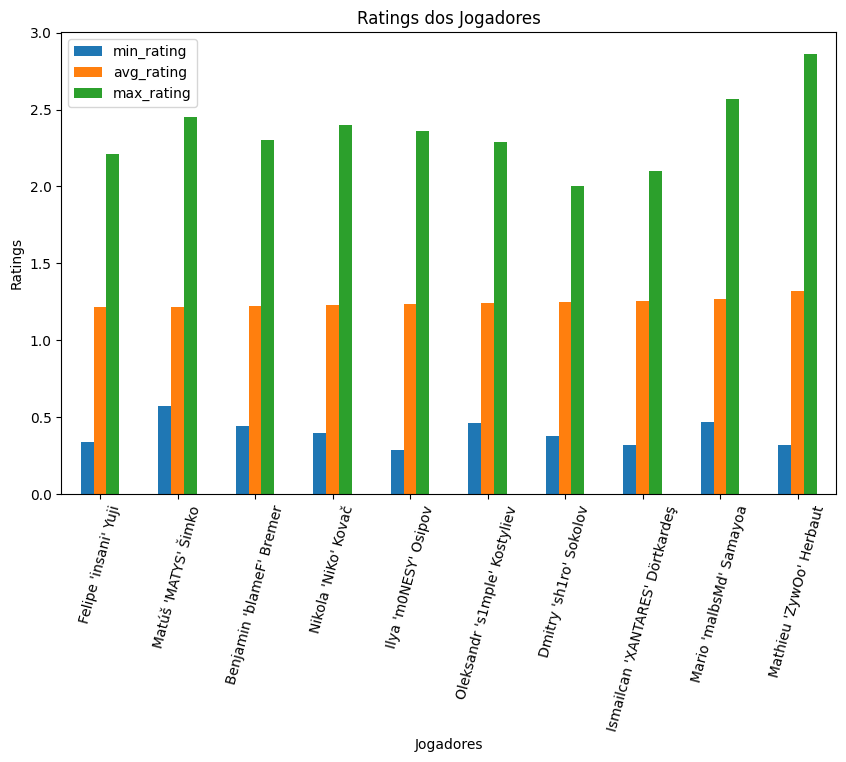

In [12]:

import matplotlib.pyplot as plt
sorted_df = best_players.sort_values(by='avg_rating', ascending=True)

plt.figure(figsize=(10, 6))
ax = sorted_df.plot(kind='bar', x='name', y=['min_rating', 'avg_rating', 'max_rating'], figsize=(10, 6), title="Ratings dos Jogadores", xlabel="Jogadores", ylabel="Ratings", legend=True)
plt.xticks(rotation=75)
plt.show()

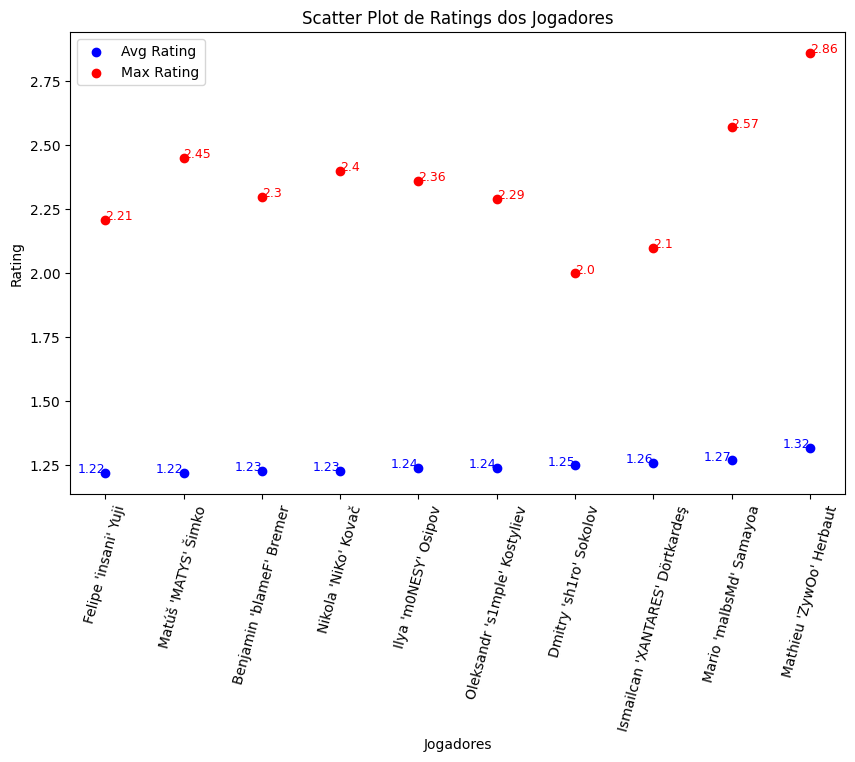

In [13]:
import matplotlib.pyplot as plt
sorted_df = best_players.sort_values(by='avg_rating', ascending=True)
sorted_df['avg_rating'] = sorted_df['avg_rating'].round(2)

# Criar o scatter plot para avg_rating e max_rating
plt.figure(figsize=(10, 6))
plt.scatter(sorted_df['name'], sorted_df['avg_rating'], color='blue', label='Avg Rating')
plt.scatter(sorted_df['name'], sorted_df['max_rating'], color='red', label='Max Rating')

# Adicionar título e rótulos
plt.title('Scatter Plot de Ratings dos Jogadores')
plt.xlabel('Jogadores')
plt.ylabel('Rating')

# Adicionar rótulos aos pontos
for i in range(len(sorted_df)):
    plt.text(sorted_df['name'].iloc[i], sorted_df['avg_rating'].iloc[i], f'{sorted_df["avg_rating"].iloc[i]}', fontsize=9, ha='right', color='blue')
    plt.text(sorted_df['name'].iloc[i], sorted_df['max_rating'].iloc[i], f'{sorted_df["max_rating"].iloc[i]}', fontsize=9, ha='left', color='red')

plt.xticks(rotation=75)
plt.legend()
plt.show()